In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

In [5]:
data=pd.read_csv("C:/Users/User/Downloads/archive/card_transdata.csv")

In [3]:
#Data Preprocessing

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
missing_values=data.isnull().any(axis=1)
print("Rows with missing values:")
print(missing_values)

Rows with missing values:
0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool


In [5]:
duplicate_rows=data[data.duplicated()]
print("Deleted Rows:")
print(duplicate_rows)

Deleted Rows:
Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud]
Index: []


In [7]:
#Random Forest

Ranked Feature Importance
ratio_to_median_purchase_price    0.527171
online_order                      0.169382
distance_from_home                0.134910
used_pin_number                   0.063928
used_chip                         0.052078
distance_from_last_transaction    0.045711
repeat_retailer                   0.006820
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_21396\3585351446.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


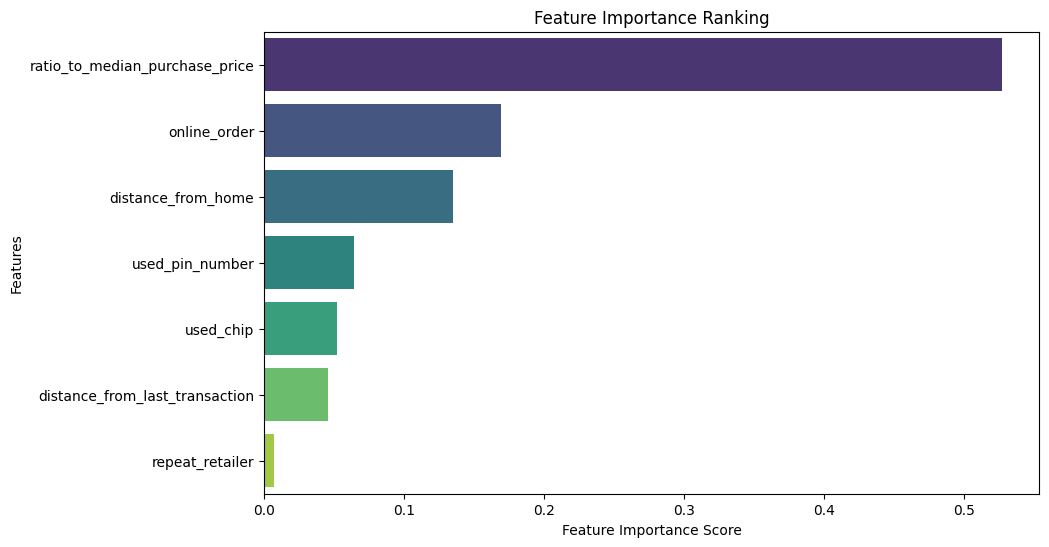

In [8]:
X=data.drop("fraud",axis=1)
y=data["fraud"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rf_classifiers=RandomForestClassifier(random_state=42)
rf_classifiers.fit(X_train,y_train)
feature_importances=pd.Series(rf_classifiers.feature_importances_,index=X.columns).sort_values(ascending=False)
print("Ranked Feature Importance")
print(feature_importances)
feature_importances = pd.Series(rf_classifiers.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")
plt.show()

In [ ]:
#Descision Tree

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
[[182556      1]
 [     2  17441]]


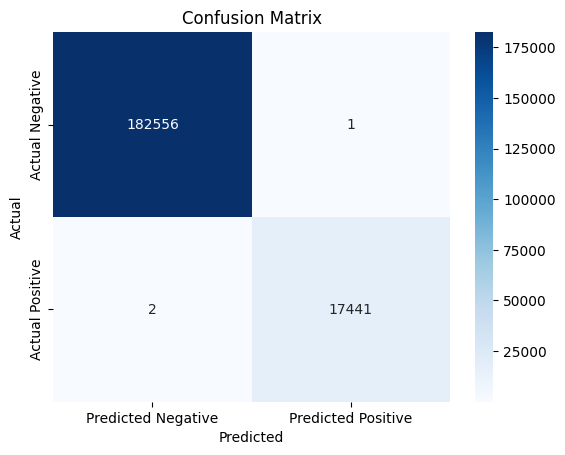

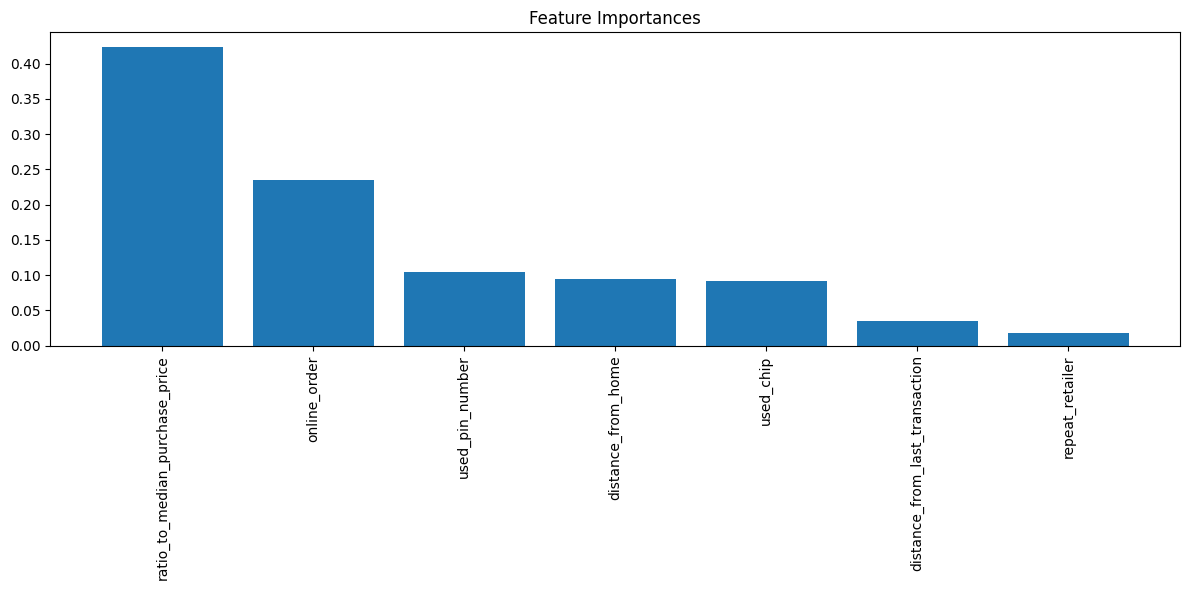

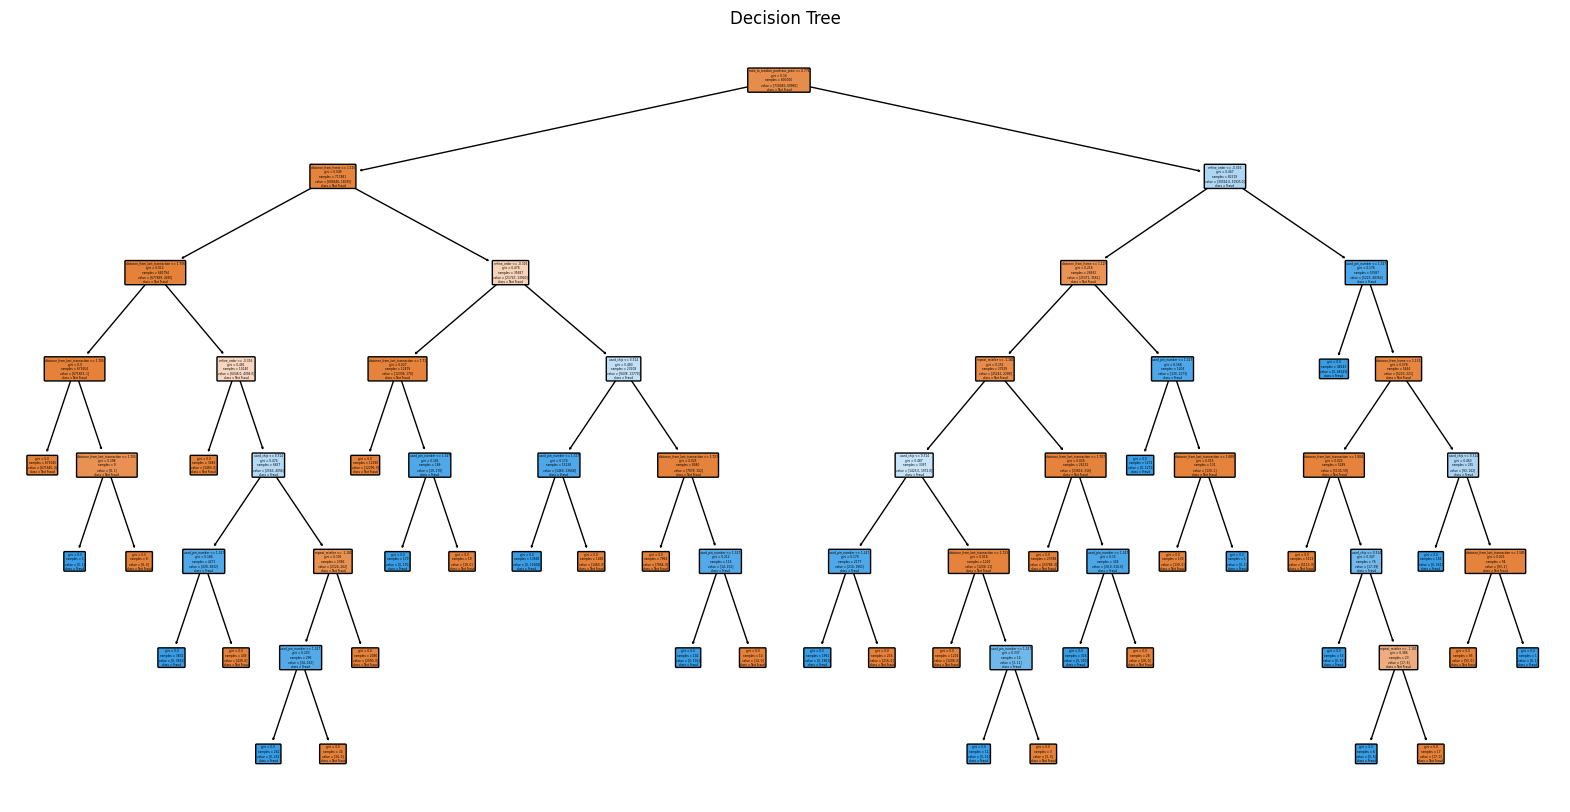

In [9]:
X = data.drop('fraud', axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importances
importances = dt.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=features, class_names=['Not Fraud', 'Fraud'], filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()

In [ ]:
#KNN

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       0.99      0.99      0.99     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
[[182468     89]
 [   161  17282]]


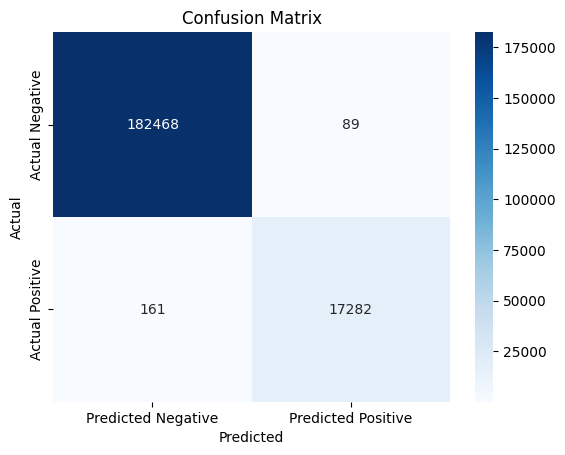

In [10]:
X = data.drop('fraud', axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


if X.shape[1] == 2:
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='Set1', alpha=0.8)
    
  
    xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 100),
                         np.linspace(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
   
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
    plt.title('Decision Boundaries for KNN')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
#Logistic Regression

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000

Confusion Matrix:
[[181283   1274]
 [  6976  10467]]


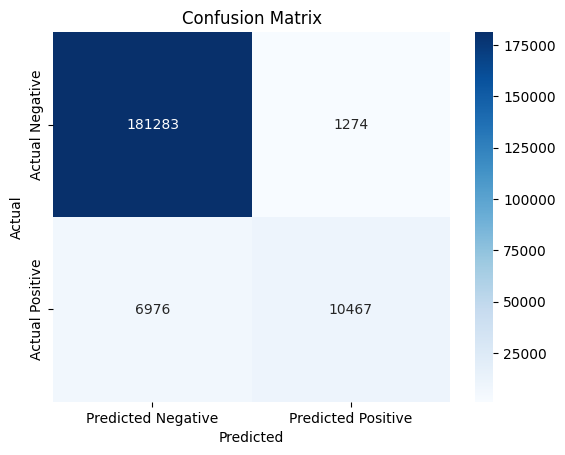

In [11]:
X = data.drop('fraud', axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 
if X.shape[1] == 2:
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='Set1', alpha=0.8)
    
     
    xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 100),
                         np.linspace(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 100))
    Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
    plt.title('Decision Boundaries for Logistic Regression')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
#Linear Regression

Mean Squared Error: 0.06
R^2 Score: 0.30


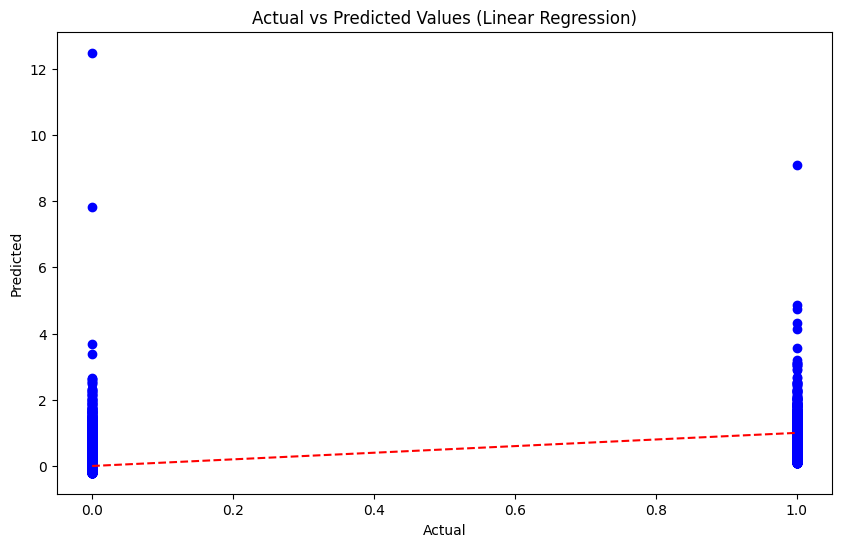

In [6]:
X = data.drop('fraud', axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

In [ ]:
#SVM

In [ ]:
X = data.drop('fraud', axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm = SVC(kernel='linear', random_state=42)  
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 
if X.shape[1] == 2:
     
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='Set1', alpha=0.8)
    
     
    xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 100),
                         np.linspace(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 100))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
    plt.title('Decision Boundaries for SVM')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
#Naive Bayes

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    182557
         1.0       0.79      0.60      0.68     17443

    accuracy                           0.95    200000
   macro avg       0.88      0.79      0.83    200000
weighted avg       0.95      0.95      0.95    200000

Confusion Matrix:
[[179744   2813]
 [  6961  10482]]


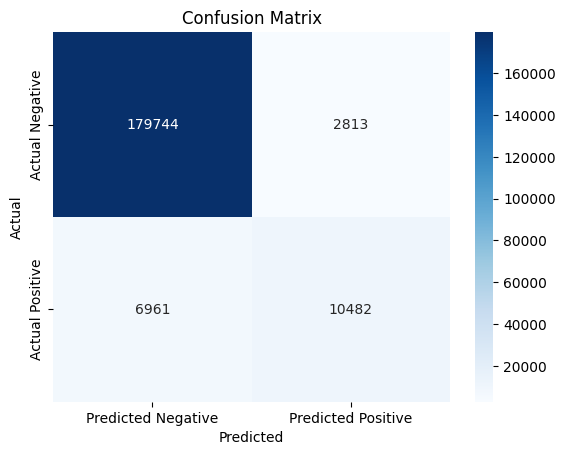

In [7]:
X = data.drop('fraud', axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 
if X.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='Set1', alpha=0.8)
    xx, yy = np.meshgrid(np.linspace(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 100),
                         np.linspace(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 100))
    Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
    plt.title('Decision Boundaries for Naive Bayes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
!pip install seaborn